# CS780: Deep Reinforcement Learning Assignment - 2
***Instructor: Ashutosh Modi***


- Submission Deadline: 11:59PM, February 22nd, 2026
- Submission Link: [https://forms.gle/sVsreFguMKG1GfQD7](https://forms.gle/sVsreFguMKG1GfQD7)

Name: **YOUR FULL NAME GOES HERE**

Roll No.: **YOUR ROLL NO**

IITK EMail: **email@iitk.ac.in**

## Instructions
Read all the instructions below carefully before you start working on the assignment.


• The purpose of this course is that you learn RL and the best way to do that is by implementation and
experimentation.

• The assignment requires your to implement some algorithms and you are required report your findings
after experimenting with those algorithms in this notebook.

• Implement the code in this Google Colab Notebook and write your findings and observations in markdown cells to create a complete report.

• In case you use any maths in your explanations, render it using latex in the notebook.

• You are expected to implement algorithms on your own and not copy it from other sources/class mates.
Of course, you can refer to lecture slides.

• If you use any reference or material (including code), please cite the source, else it will be considered
plagiarism. But referring to other sources that directly solve the problems given in the assignment is not
allowed. There is a limit to which you can refer to outside material.

• This is an individual assignment.

• In case your solution is found to have an overlap with solution by someone else (including external sources),
all the parties involved will get zero in this and all future assignments plus further more penalties in the
overall grade. We will check not just for lexical but also semantic overlap. Same applies for the code as
well. Even an iota of cheating would NOT be tolerated. If you cheat one line or cheat one page
the penalty would be same.

• Be a smart agent, think long term, if you cheat we will discover it somehow, the price you would be paying
is not worth it.

• In case you are struggling with the assignment, seek help from TAs. Cheating is not an option! I respect
honesty and would be lenient if you are not able to solve some questions due to difficulty in understanding.
Remember we are there to help you out, seek help if something is difficult to understand.

• The deadline for the submission is given above. Submit at least 30 minutes before the deadline, lot can
happen at the last moment, your internet can fail, there can be a power failure, you can be abducted by
aliens, etc.

• You have to submit your assignment via a Google Form (link above)

• The form would close after the deadline and we will not accept any solution. No reason what-so-ever
would be accepted for not being able to submit before the deadline.

• Since the assignment involves experimentation, reporting your results and observations, there is a lot
of scope for creativity and innovation and presenting new perspectives. Such efforts would be highly
appreciated and accordingly well rewarded. Be an exploratory agent!

• Your code should be very well documented, there are marks for that.

• In your plots, have a clear legend and clear lines, etc. Of course you would generating the plots in your
code but you must also put these plots in your notebook.

• For all experiments, report about the seed used in the code documentation, write about the seed used.

• In your notebook write about all things that are not obvious from the code e.g., if you have made any
assumptions, references/sources, running time, etc.

<font color = red><b>

• In addition to checking your code and report, very likely, we will be conducting one-on-one
viva for the evaluation. So please make sure that you do not cheat!
</font></b>

<font color = red><b>
• If you use LLMs or LLM based tools (also refer to usage policy below) for coding or for any other purpose, please declare it very clearly in your solution (see the declaration form below). You need to answer questions like: What was the LLM used for? What was your contibution after the LLM usage? Any other information that shows that despite using the LLM you did make contibutions to the assignment, things like analysis, etc. Failure to declare would taken as cheating/plagiarism and will be very heavily penalized.
</font></b>




# LLM Usage Policy

It is **OK** to use LLM or other sources (websites, blogs, books, etc) for:
* Coding ancillary parts of the algorithm such as plotting graphs, etc.
* To develop understanding of the algorithm in the case it is not clear to you

It is **NOT OK** to use LLM or other sources (websites, blogs, books, etc) for:
* Writing the code for the main parts of the algorithm especially given that I have already provided pseudo-code in the lectures. (You can use pseudo code as it is from the lecture slides)
* For doing hyper-parameter tuning of the algorithm.
* For doing analysis of the results and drawing conclusions about it

Since RL is specialized domain, it is very straight forward to detect when someone (especially a newbie) is taking code from LLM or other sources. In case you are found to do so (even for a small part of assignment), there will be no questions asked direct zero will be awarded to you along with further penalties which will affect your final grade.

Be a smart agent (remember Honesty is the best Policy), it is ok to loose a few marks than getting a zero + penalties. It is OK if you don't do all questions in the assignment which will cost you a few marks vs getting 0.

**Remember that grading is relative and you are not the only one who is finding it tough!**


# LLM Usage Declaration

It is permitted to use Large Language Models (LLMs) **only for understanding concepts, ideation, and creating initial code stubs**.  
Using an LLM to **completely solve the assignment is not allowed**.  

Even if an LLM is used for the permitted purposes, you **must be able to clearly explain the solution without any LLM assistance during the viva**, if called.

---

### Q1. **Which Large Language Model (LLM) did you use to complete this assignment?**

> _Your answer here_

---

### Q2. **In which questions did you use the LLM, and how did it help you?**  
(You may extend this table by adding more rows if needed.)

| Question Number / Sub-part | Used LLM? (Yes/No) | Purpose of Using LLM (e.g., ideation, explanation, code stub, grammar) | Brief Description of LLM Contribution |
|----------------------------|--------------------|------------------------------------------------------------------------|-------------------------------------|
| Q1                         |                    |                                                                        |                                     |
| Q2                         |                    |                                                                        |                                     |
| Q3                         |                    |                                                                        |                                     |
| Q4                         |                    |                                                                        |                                     |

---

### Q3. **Did you refer to any other sources or websites apart from the LLM and lecture slides?**  

If yes, please mention the source(s) clearly:
> _Example: Research papers, blogs, documentation, textbooks, etc._

---

### Q4. **Apart from using any LLM, what was your own contribution while solving this assignment?**  

Briefly describe:
- Your understanding of the concepts  
- The reasoning you applied  
- Any implementation or analysis done independently  

> _Your answer here_

---


# OpenAI Gym Environments
<a id="Environment"></a>

In [ ]:
# all imports go in here
import gymnasium as gym
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

## **Random-Maze Environment**

**In this assignment we will be exploring a variant of the Random Maze Environment (RME) that we have been looking in the lectures.**

The environment is represented as a grid world in Figure 1a. Random maze environment
is a highly stochastic environment with 11 states: two terminal states (a goal state (G) and a hole state (H))
and 9 non-terminal states and a wall in between the environment. The wall behaves similar to the wall on the
periphery of the environment, basically if an agent bumps against the wall, it bounces back. The boundary of
the environment behaves similarly, if an agent hits the boundary it bounces back. The agent receives a reward
of +1 when it lands in the goal state (3) and it receives a reward of -1 when it lands in the hole state (7).
For rest of the transitions there is a reward of -0.04. Essentially the agent has the living cost of -0.04.

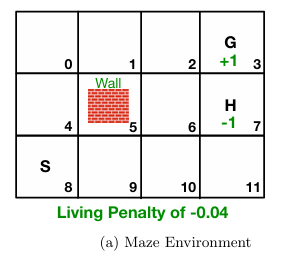

The transitions are stochastic as shown in Figure 1b. In this environment, four actions are possible: left, top, right,
and bottom. For every intended action, there is 80% chance of going in the intended direction and remaining
20% chances of going in either of the orthogonal directions. The 20% chance gets equally distributed between
each of the orthogonal direction. The agent starts from state 8 (S). Assume γ = 0.99 for the problems below.


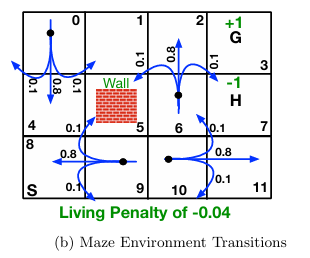

In this assignment we will be looking at control algorithms we learnt in Lectures. For each of the plot, create
the legend on the left/right side so that it doesn’t overlay on the plot. For all the algorithms below,
this time we will not be specifying the hyper-parameters, please play with the hyper-params to come up with
the best values. This way you will learn to tune the model. As you are aware from your past experience, single
run of the algorithm over the environment results in plots that have lot of variance and look very noisy. One
way to overcome this is to create several different instances of the environment using different seeds and then
average out the results across these and plot these. For all the plots below, use this strategy.


# Create the Maze Environment

In [ ]:
class SlipperyMaze(Env):
    """
    A stochastic grid-based maze environment where actions may result
    in unintended movements due to slippery transitions.
    """

    def __init__(self, config=None):
        """
        Initializes the Slippery Maze Environment.

        Args:
            config (dict or None):
                A configuration dictionary containing environment parameters.
                It includes maze dimensions, number of states and actions,
                start, goal, wall, and hole states, reward values, and
                random seed information.

        Returns:
            None
        """
        pass

    def _make_environment(self, config):
        """
        Creates the transition probability model for the maze.

        Args:
            config (dict):
                Dictionary defining the maze layout, total states,
                total actions, maze shape, wall locations, and reward
                specifications.

        Returns:
            dict:
                A transition dictionary P such that:
                P[state][action] is a list of tuples
                (probability, next_state, reward, terminated),
                describing the stochastic outcome of taking an action
                in a given state.
        """
        pass

    def _is_terminated(self, state):
        """
        Checks whether a given state is a terminal state.

        Args:
            state (int):
                The current state index of the agent.

        Returns:
            bool:
                True if the state corresponds to a goal or hole state,
                otherwise False.
        """
        pass

    def _get_reward(self, state):
        """
        Computes the reward associated with a given state.

        Args:
            state (int):
                The state index reached after taking an action.

        Returns:
            float:
                Reward value for the given state. This may represent
                a goal reward, hole penalty, or living reward.
        """
        pass

    def _get_obs(self):
        """
        Generates the observation returned to the agent.

        Returns:
            dict:
                A dictionary containing:
                - agent: the agent's current state
                - terminals: list of terminal states
        """
        pass

    def _get_info(self):
        """
        Provides auxiliary diagnostic information.

        Returns:
            dict:
                A dictionary containing additional information such as
                the Manhattan distance between the agent and the goal state.
        """
        pass

    def reset(self, seed=None, options=None):
        """
        Resets the environment to its initial configuration.

        Args:
            seed (int or None):
                Random seed used to ensure reproducibility.
            options (dict or None):
                Additional reset options (if any).

        Returns:
            observation (dict):
                Initial observation of the environment.
            info (dict):
                Additional information after reset.
        """
        pass

    def step(self, action):
        """
        Executes one time step within the environment.

        Args:
            action (int):
                Action selected by the agent. Represents a movement
                direction in the maze.

        Returns:
            observation (dict):
                Observation after performing the action.
            reward (float):
                Reward received after the action.
            terminated (bool):
                Whether the episode has reached a terminal state.
            truncated (bool):
                Whether the episode was truncated due to time limits.
            info (dict):
                Additional diagnostic information including transition logs.
        """
        pass

    def render(self):
        """
        Renders the current state of the environment.

        Returns:
            None
        """
        pass

    def _render_frame(self):
        """
        Renders a single frame of the environment for visualization.

        Returns:
            None
        """
        pass

    def close(self):
        """
        Cleans up environment resources.

        Returns:
            None
        """
        pass

In [ ]:
# Register the environment
# Register your custom environment with Gym/Gymnasium here
# Use a unique environment ID and your environment class as the entry point
# This registration will allow gym.make() to create the environment


In [ ]:
CONFIG = {
    'seed': _,
    'environment': {
        'total_states': _,
        'maze_shape': (_, _),
        'living_reward': _,
        'total_actions': _,
        'start_state': _,
        'goal_state': _,
        'hole_state': _,
        'goal_reward': _,
        'hole_reward': _,
        'wall_state': _,
    }
}

# Define some utility function: You are free to use or not use them & define yours

### Generate Trajectory based on Policy $\pi$ and return experience tuples $(s, a, r, s^{\prime})$

In [ ]:
def generate_episode_trajectory(environment, Q, epsilon=None, config=None):
    """
    Generates a single episode trajectory by interacting with the environment
    using an epsilon-greedy policy derived from a given Q-function.

    Args:
        environment (gym.Env):
            The environment in which the agent operates. It must support
            reset() and step() methods and define a discrete action space.

        Q (numpy.ndarray):
            The action-value function (Q-table) of shape
            (number_of_states, number_of_actions). It is used to select
            greedy actions during exploitation.

        epsilon (float or None):
            Probability of selecting a random action instead of the greedy
            action. If None, the value is taken from the configuration.

        config (dict):
            Configuration dictionary containing episode-level parameters.
            This includes:
            - random seed
            - exploration rate
            - maximum number of steps per episode
            - environment-specific parameters

    Returns:
        list:
            A list of tuples representing the episode trajectory.
            Each tuple has the form:
            (current_state, action, reward, next_state)

            If the episode exceeds the maximum allowed number of steps,
            an empty list is returned.
    """
    pass


In [ ]:
CONFIG = {
    'seed': _,
    'max_episodes': _,
    'discount_factor': _,
    'policy_name': '_',
    'policy_action': _,
    'max_steps': _,
    'check_trajectories': _,
    'epsilon': 0._, # _0% chance of exploration
    'environment': {
        'total_states': _,
        'maze_shape': (_, _),
        'living_reward': _,
        'total_actions': _,
        'start_state': _,
        'goal_state': _,
        'hole_state': _,
        'goal_reward': _,
        'hole_reward': _,
        'wall_state': _,
    }
}


### Decay $\alpha$

In [ ]:
def decay_step_size(initial_value, final_value, episode, max_episode, decay_type, decay_stop=None):
    """
    Computes the step size (learning rate) for a given episode based on
    a specified decay strategy.

    Args:
        initial_value (float):
            Initial step size at the beginning of training.

        final_value (float):
            Final step size to which the learning rate decays.

        episode (int):
            Current episode index for which the step size is computed.

        max_episode (int):
            Total number of episodes over which decay is applied.

        decay_type (str):
            Type of decay strategy used for step size scheduling.
            Supported values include 'exponential' and 'linear'.

        decay_stop (int or None):
            Optional episode index after which the step size remains
            constant at the final value.

    Returns:
        float:
            Step size corresponding to the given episode based on the
            chosen decay strategy.
    """
    pass


In [ ]:
def generate_episode_step_sizes(initial_value, final_value, max_episode, decay_type, decay_stop=None):
    """
    Generates step sizes for all episodes using a specified decay strategy.

    Args:
        initial_value (float):
            Initial step size at the start of training.

        final_value (float):
            Final step size at the end of decay.

        max_episode (int):
            Total number of episodes for which step sizes are generated.

        decay_type (str):
            Decay strategy used to compute step sizes
            (e.g., 'exponential' or 'linear').

        decay_stop (int or None):
            Optional episode index after which the step size
            remains fixed.

    Returns:
        list:
            A list of step size values, where each entry corresponds
            to the step size for a particular episode.
    """
    pass


In [ ]:
def plot_step_size_decay(step_sizes, max_steps, decay_type):
    """
    Visualizes the decay of step size across episodes.

    Args:
        step_sizes (list or numpy.ndarray):
            Sequence of step size values for each episode.

        max_steps (int):
            Number of episodes over which the step sizes are plotted.

        decay_type (str):
            Name of the decay strategy used, displayed in the plot title.

    Returns:
        None
    """
    pass


In [ ]:
CONFIG = {
    "seed": _,
    'max_episodes': _,
    'discount_factor': _,
    'policy_name': '_',
    'policy_action': _,
    'max_steps': _,
    'environment': {
        'total_states': _,
        'maze_shape': (_, _),
        'living_reward': _,
        'total_actions': _,
        'start_state': _,
        'goal_state': _,
        'hole_state': _,
        'goal_reward': _,
        'hole_reward': _,
        'wall_state': _,
    },
    'step_size': {
        'initial_value': _,
        'final_value': _,
        'decay_type': '_',
        'decay_stop': _
    }
}



### Decay $\epsilon$

In [ ]:
def decay_epsilon(initial_value, final_value, episode, max_episode, decay_type, decay_stop=None):
    """
    Computes the exploration rate (epsilon) for a given episode based on
    a specified decay strategy.

    Args:
        initial_value (float):
            Initial value of epsilon at the beginning of training.

        final_value (float):
            Minimum value of epsilon after decay.

        episode (int):
            Current episode index for which epsilon is computed.

        max_episode (int):
            Total number of episodes over which epsilon decay is applied.

        decay_type (str):
            Type of decay strategy used for epsilon scheduling.
            Supported values include 'exponential' and 'linear'.

        decay_stop (int or None):
            Optional episode index after which epsilon remains
            fixed at the final value.

    Returns:
        float:
            Epsilon value corresponding to the given episode based on
            the chosen decay strategy.
    """
    pass


In [ ]:
def generate_episode_epsilons(initial_value, final_value, max_episode, decay_type, decay_stop=None):
    """
    Generates epsilon values for all episodes using a specified decay strategy.

    Args:
        initial_value (float):
            Initial epsilon value at the start of training.

        final_value (float):
            Final epsilon value after decay.

        max_episode (int):
            Total number of episodes for which epsilon values are generated.

        decay_type (str):
            Decay strategy used for computing epsilon values
            (e.g., 'linear' or 'exponential').

        decay_stop (int or None):
            Optional episode index after which epsilon remains constant.

    Returns:
        list:
            A list of epsilon values, where each element corresponds
            to the exploration rate for a particular episode.
    """
    pass


In [ ]:
def plot_epsilon_decay(step_sizes, max_steps, decay_type):
    """
    Visualizes the decay of epsilon across training episodes.

    Args:
        step_sizes (list or numpy.ndarray):
            Sequence of epsilon values across episodes.

        max_steps (int):
            Number of episodes over which epsilon decay is plotted.

        decay_type (str):
            Name of the decay strategy used, displayed in the plot title.

    Returns:
        None
    """
    pass


In [ ]:
CONFIG = {
    "seed": _,
    'max_episodes': _,
    'discount_factor': _,
    'policy_name': '_',
    'policy_action': _,
    'max_steps': _,
    'environment': {
        'total_states': _,
        'maze_shape': (_, _),
        'living_reward': _,
        'total_actions': _,
        'start_state': _,
        'goal_state': _,
        'hole_state': _,
        'goal_reward': _,
        'hole_reward': _,
        'wall_state': _,
    },
    'step_size': {
        'initial_value': _,
        'final_value': _,
        'decay_type': '_',
        'decay_stop': _
    },
    'epsilon': {
        'initial_value': _,
        'final_value': _,
        'decay_type': '_',
        'decay_stop': _
    }
}



In [ ]:
def get_policy_success(environment, policy, config=None):
    """
    Evaluates whether a given policy successfully reaches the goal state
    within a specified number of steps and computes the discounted return.

    Args:
        environment (gym.Env):
            The environment in which the policy is evaluated. It must
            support reset() and step() operations.

        policy (list or numpy.ndarray):
            A deterministic policy mapping each state to an action.
            The index represents the state and the value represents
            the action selected in that state.

        config (dict):
            Configuration dictionary containing evaluation parameters.
            This includes:
            - random seed
            - maximum number of steps
            - discount factor
            - environment-specific goal state information

    Returns:
        success (bool):
            True if the policy reaches the goal state within the allowed
            number of steps, otherwise False.

        return_reward (float):
            Discounted cumulative reward obtained while following
            the policy during the episode.
    """
    pass


In [ ]:
def plot_episode_values(V_r, image_name, config=None):
    """
    Visualizes the evolution of value estimates for non-terminal states
    across multiple episodes.

    Args:
        V_r (numpy.ndarray):
            A 2D array containing value estimates for each state
            across episodes. Each row corresponds to an episode,
            and each column corresponds to a state.

        image_name (str):
            Name of the output image file in which the plot
            will be saved.

        config (dict):
            Configuration dictionary containing experiment parameters.
            This includes:
            - total number of episodes
            - environment-specific state information
            - plotting-related settings

    Returns:
        None
    """
    pass


In [ ]:
actions = ['right', 'up', 'left', 'down']


In [ ]:
def plot_episode_q_values(Q_r, image_name, config=None):
    """
    Visualizes the evolution of action-value (Q) estimates for all actions
    and non-terminal states across multiple episodes.

    Args:
        Q_r (numpy.ndarray):
            A 3D array containing Q-value estimates.
            Dimensions correspond to:
            - episodes
            - states
            - actions

        image_name (str):
            Name of the output image file in which the plot
            will be saved.

        config (dict):
            Configuration dictionary containing experiment parameters.
            This includes:
            - number of episodes
            - total number of states
            - total number of actions
            - environment-specific terminal and wall states

    Returns:
        None
    """
    pass


In [ ]:
def run_tests(n_tests=50, method=None, config=None):
    """
    Executes multiple independent experimental trials for a given
    reinforcement learning method and aggregates the results.

    Args:
        n_tests (int):
            Number of independent test runs to be performed. Each test
            uses a different random seed to evaluate robustness and
            stability of the learning method.

        method (callable):
            A reinforcement learning control method to be evaluated.
            This function is expected to take an environment and a
            configuration dictionary as input and return learned
            value functions, policies, and performance metrics.

        config (dict):
            Configuration dictionary containing experiment and
            environment parameters. This includes:
            - number of episodes
            - environment settings
            - learning hyperparameters
            - random seed information

    Returns:
        Qs (numpy.ndarray):
            A 4D array containing Q-value estimates for all tests,
            episodes, states, and actions.

        V_e (numpy.ndarray):
            A 3D array containing state-value estimates for all tests,
            episodes, and states.

        policy_success (numpy.ndarray):
            A 2D boolean array indicating whether the learned policy
            successfully reached the goal state in each episode
            across all tests.

        return_reward (numpy.ndarray):
            A 2D array containing the discounted return obtained
            in each episode across all test runs.
    """
    pass


# Initialize parameters which can be useful later (Optional Here)

In [ ]:
policy_success = np.zeros((4, 50, CONFIG['max_episodes']), dtype=bool)
return_reward = np.zeros((4, 50, CONFIG['max_episodes']))
state_value_estimation = np.zeros((4, CONFIG['max_episodes'], CONFIG['environment']['total_states']))

# Problem 1: Monte Carlo Control (40 points)
($40+20+20+5+5+5+5=100$ points)

Implement the Monte Carlo Control for the Random Maze Environment (RME) described above. In particular, you need to implement First Visit Monte Carlo Control (FMVCC) for finding the optimal policy for
RME. Use the function definition (given below) as given in Lecture slides.
MonteCarloControl(env, $\gamma$, $\alpha_0$, $\epsilon_0$, maxSteps, noEpisodes, firstVisit = True)


In [ ]:
def monte_carlo_control(environment, config=None):
   """
    Implements Monte Carlo Control for a discrete Random Maze Environment (RME).

    This function applies First-Visit Monte Carlo Control (FMVCC) to learn the
    optimal action-value function Q(s, a) and the corresponding optimal policy.
    An epsilon-greedy policy is used for exploration, with optional decay of
    epsilon and step size across episodes.

    Args:
        environment (gym.Env): Environment with discrete observation and action spaces.
        config (dict): Configuration dictionary containing:
            - max_episodes (int): Number of Monte Carlo episodes.
            - discount_factor (float): Discount factor γ.
            - step_size (dict): Step-size (alpha) decay parameters.
            - epsilon (dict): Epsilon-greedy decay parameters.
            - monte_carlo_strategy (str): 'first_visit' or 'every_visit'.

    Returns:
        Q (np.ndarray): Final learned action-value function of shape (S, A).
        V_e (np.ndarray): State-value estimates per episode.
        policy (np.ndarray): Final greedy policy derived from Q.
        Qs (np.ndarray): History of Q-values across episodes.
        mc_target_tensor (np.ndarray): Monte Carlo return targets for each (s, a).
        policy_success (np.ndarray): Boolean success indicator per episode.
        return_reward (np.ndarray): Total return obtained per episode.
    """


   pass

### (a) Plot State-value (20 points)
Plot evolution of State-value (V) function with time. Basically, plot V-function vs Episodes for states 0,
1, 2, 4, 6, 8, 9, 10, 11 in a single plot. Also plot the true V-function for each of the state in the same plot.


In [ ]:
# plot_episode_values ()

###(b) Plot Action state value (20 points)
Plot evolution of action state value (Q) function with time. Plot Q function vs Episodes for states 0, 1,
2, 4, 6, 8, 9, 10, 11 in a single plot. Also plot the true Q-function for each of the state in the same plot.


In [ ]:
# plot_episode_q_values ()

###(c) Instances and seeds (5 Points)
 Describe over how many instances of the environments did you average the results? Write about the seeds used for each instance.


[Write your answer here]

###(d) Environment diagram (5 points)
Draw the environment diagram with optimal policy (shown using arrows) obtained using the algorithm.


[Write your answer here]

###(e) Hyper-parameters (5 points)
Write about the hyper-parameters you finally used for the algorithm and describe how did you arrive at these set of hyper-params.

[Write your answer here]

###(f) Observations (5 points)
Write about your observations from the plots above.

[Write your answer here]

# Problem 2: SARSA (TD Control)
($40+20+20+5+5+5+5=100$ points)

Implement the SARSA algorithm for the Random Maze Environment (RME) described above. Use the function definition as given in Lecture slides.
SARSA(env,$\gamma$, $\alpha_0$, $\epsilon_0$, noEpisodes)(40 Points)



In [ ]:
def sarsa_control(environment, config=None):
    """
    Implements the SARSA (State–Action–Reward–State–Action) algorithm for a
    discrete Random Maze Environment (RME).

    This function applies the on-policy Temporal Difference (TD) control method
    SARSA to learn the optimal action-value function Q(s, a). An epsilon-greedy
    policy is used for both action selection and policy evaluation, with optional
    decay of the learning rate (alpha) and exploration rate (epsilon) across
    episodes.

    Args:
        environment (gym.Env): Environment with discrete observation and action spaces.
        config (dict): Configuration dictionary containing:
            - max_episodes (int): Number of training episodes.
            - discount_factor (float): Discount factor γ.
            - step_size (dict): Learning rate (alpha) decay parameters.
            - epsilon (dict): Epsilon-greedy exploration decay parameters.
            - seed (int): Random seed for environment reset.

    Returns:
        Q (np.ndarray): Final learned action-value function of shape (S, A).
        V_s (np.ndarray): State-value estimates derived from Q for each episode.
        policy (np.ndarray): Final greedy policy derived from Q.
        Qs (np.ndarray): History of Q-values across episodes.
        td_target (float): Last computed TD target value.
        policy_success (np.ndarray): Boolean success indicator per episode.
        return_reward (np.ndarray): Total return obtained per episode.
    """


    pass


###(a) State-value function (20 Points)
Plot evolution of State-value (V) function with time. Basically, plot V-function vs Episodes for states 0,
1, 2, 4, 6, 8, 9, 10, 11 in a single plot. Also plot the true V-function for each of the state in the same plot.


In [ ]:
# plot_episode_values ()

###(b) Action state value (Q) function (20 Points)
Plot evolution of action state value (Q) function with time. Plot Q function vs Episodes for states 0, 1,
2, 4, 6, 8, 9, 10, 11 in a single plot. Also plot the true Q-function for each of the state in the same plot.


In [ ]:
# plot_episode_q_values ()

###(c) Instances and seeds (5 Points)
Describe over how many instances of the environments did you average the results? Write about the seeds used for each instance.


[Write your answer here]

###(d) Environment diagram (5 Points)
Draw the environment diagram with optimal policy (shown using arrows) obtained using the algorithm.


[Write your answer here]

###(e) Hyper-parameters (5 Points)
Write about the hyper-parameters you finally used for the algorithm and describe how did you arrive at these set of hyper-params.


[Write your answer here]

###(f) Observations (5 Points)
Write about your observations from the plots above.

[Write your answer here]

# Problem 3: Q-Learning
($40+20+20+5+5+5+5=100$ points)

Implement the Q-Learning algorithm for the Random Maze Environment (RME) described above. Use the function definition as given in Lecture slides.
Q-Learning(env, $\gamma$, $\alpha_0$, $\epsilon_0$, noEpisodes) (40 Points)

In [ ]:
def q_learning_control(environment, config=None):
    """
    Implements the Q-Learning algorithm for a discrete Random Maze Environment (RME).

    This function applies Q-Learning, an off-policy Temporal Difference (TD) control
    algorithm, to learn the optimal action-value function Q(s, a). Action selection
    is performed using an epsilon-greedy behavior policy, while updates are based on
    the greedy target policy. Learning rate (alpha) and exploration rate (epsilon)
    may decay across episodes.

    Args:
        environment (gym.Env): Environment with discrete observation and action spaces.
        config (dict): Configuration dictionary containing:
            - max_episodes (int): Number of training episodes.
            - discount_factor (float): Discount factor γ.
            - step_size (dict): Learning rate (alpha) decay parameters.
            - epsilon (dict): Epsilon-greedy exploration decay parameters.
            - seed (int): Random seed for environment reset.

    Returns:
        Q (np.ndarray): Final learned action-value function of shape (S, A).
        V_s (np.ndarray): State-value estimates derived from Q for each episode.
        policy (np.ndarray): Final greedy policy derived from Q.
        Qs (np.ndarray): History of Q-values across episodes.
        None: Placeholder (no TD target history stored).
        policy_success (np.ndarray): Boolean success indicator per episode.
        return_reward (np.ndarray): Total return obtained per episode.
    """


    pass


###(a) State-value (V) function (20 Points)
Plot evolution of State-value (V) function with time. Basically, plot V-function vs Episodes for states 0,
1, 2, 4, 6, 8, 9, 10, 11 in a single plot. Also plot the true V-function for each of the state in the same plot.

In [ ]:
# plot_episode_values ()

###(b)Action state value (Q) function (20 Points)
Plot evolution of action state value (Q) function with time. Plot Q function vs Episodes for states 0, 1,
2, 4, 6, 8, 9, 10, 11 in a single plot. Also plot the true Q-function for each of the state in the same plot.

In [ ]:
# plot_episode_q_values ()

###(c) Instances and seeds (5 Points)
Describe over how many instances of the environments did you average the results? Write about the seeds used for each instance.

[Write your answer here]

###(d) Environment diagram (5 Points)
Draw the environment diagram with optimal policy (shown using arrows) obtained using the algorithm.

[Write your answer here]

###(e) hyper-parameters (5 Points)
Write about the hyper-parameters you finally used for the algorithm and describe how did you arrive at
these set of hyper-params.

[Write your answer here]

###(f) Observations (5 Points)
Write about your observations from the plots above.

[Write your answer here]

# **Problem 4: Double Q-Learning**

($40+20+20+5+5+5+5=100$ points)

Implement the Double Q-Learning algorithm for the Random Maze Environment (RME) described above.
Use the function definition as given in Lecture slides.

Double-Q-Learning(env, $\gamma$, $\alpha_0$, $\epsilon_0$, noEpisodes) (40 Points)

In [ ]:
def double_q_learning_control(environment, config=None):
    """
    Implements the Double Q-Learning algorithm for a discrete Random Maze
    Environment (RME).

    This function applies Double Q-Learning, an off-policy Temporal Difference
    (TD) control algorithm designed to reduce maximization bias present in
    standard Q-Learning. Two independent action-value functions (Q1 and Q2)
    are learned by alternating updates, while action selection is performed
    using an epsilon-greedy policy derived from their average.

    Args:
        environment (gym.Env): Environment with discrete observation and action spaces.
        config (dict): Configuration dictionary containing:
            - max_episodes (int): Number of training episodes.
            - discount_factor (float): Discount factor γ.
            - step_size (dict): Learning rate (alpha) decay parameters.
            - epsilon (dict): Epsilon-greedy exploration decay parameters.
            - seed (int): Random seed for environment reset.

    Returns:
        Q (np.ndarray): Final combined action-value function (average of Q1 and Q2).
        V_s (np.ndarray): State-value estimates derived from Q for each episode.
        policy (np.ndarray): Final greedy policy derived from Q.
        Qs (np.ndarray): History of combined Q-values across episodes.
        None: Placeholder (no TD target history stored).
        policy_success (np.ndarray): Boolean success indicator per episode.
        return_reward (np.ndarray): Total return obtained per episode.
    """

        pass


###(a) State-value (V) function (20 Points)
Plot evolution of State-value (V) function with time. Basically, plot V-function vs Episodes for states 0,
1, 2, 4, 6, 8, 9, 10, 11 in a single plot. Also plot the true V-function for each of the state in the same plot.

In [ ]:
# plot_episode_values ()


###(b) Action state value (Q) function (20 Points)
Plot evolution of action state value (Q) function with time. Plot Q function vs Episodes for states 0, 1,
2, 4, 6, 8, 9, 10, 11 in a single plot. Also plot the true Q-function for each of the state in the same plot.


In [ ]:
# plot_episode_q_values ()

###(c) Instances and seeds (5 Points)
Describe over how many instances of the environments did you average the results? Write about the seeds
used for each instance.


[Write your answer here]

###(d) Environment diagram (5 Points)
Draw the environment diagram with optimal policy (shown using arrows) obtained using the algorithm.


[Write your answer here]

###(e) hyper-parameters (5 Points)
Write about the hyper-parameters you finally used for the algorithm and describe how did you arrive at
these set of hyper-params.


[Write your answer here]

###(f) Observations (5 Points)
Write about your observations from the plots above.


[Write your answer here]

# **Problem 5: Comparing Control Algorithms**
($20+5+5+5+5+5=40$ points)

For FVMCC, SARSA, Q and Double-Q algorithms implemented above, do the following:

###(a)Policy Success Rate (in %) vs Episodes (20 Points)
For each of the algorithm, in a single plot, plot the evolution of Policy Success Rate (in %) vs Episodes.
Policy Success Rate is defined as number of times the agent reaches the goal state out of the total number
of the episodes run using a specific policy. Basically implement the following function that would return
the policy success percentage. As you are training the agent, at each episode, you will have a version of
the policy, use that policy along with the function below to get the policy success rate.

def getPolicySuccessRate(env, $π_\text{current}$, goalState, maxEpisodes=100, maxSteps=200)

In [ ]:
def plot_policy_success(policy_success, title, image_name, config=None):
    """
    Plots the evolution of Policy Success Rate (%) versus Episodes for multiple
    reinforcement learning algorithms.

    This function computes the mean policy success rate across runs for each
    algorithm and plots them on a single graph. Policy Success Rate is defined
    as the percentage of episodes in which the agent reaches the goal state
    when following the learned policy at that episode.

    The plot includes curves for:
        - First-Visit Monte Carlo Control (FVMC)
        - SARSA
        - Q-Learning
        - Double Q-Learning

    Args:
        policy_success (np.ndarray): Boolean array indicating policy success
            across episodes for each algorithm. Expected shape:
            (num_algorithms, max_episodes, num_runs) or equivalent.
        title (str): Title of the plot.
        image_name (str): Filename for saving the generated plot.
        config (dict): Configuration dictionary containing:
            - max_episodes (int): Number of training episodes.

    Returns:
        None: The function saves the plot to disk.
    """


    pass



###(b)Policy Success Rate (in %) plot (5 Points)
What are your observations from the Policy Success Rate (in %) plot.


[write your answer here]

###(c) Estimated Expected Return (5 Points)
For each of the algorithm (in a single plot), plot the Estimated Expected Return (from the start state) vs
Episodes.


In [ ]:
def plot_expected_return(return_reward, title, image_name, config=None):
    """
    Plots the Estimated Expected Return from the start state versus Episodes
    for multiple reinforcement learning algorithms.

    This function computes the average expected return across runs for each
    algorithm at every episode and visualizes their learning performance on
    a single plot. The expected return reflects the cumulative discounted
    reward obtained by following the learned policy from the start state.

    The plot includes curves for:
        - First-Visit Monte Carlo Control (FVMC)
        - SARSA
        - Q-Learning
        - Double Q-Learning

    Args:
        return_reward (np.ndarray): Array containing episode returns for each
            algorithm. Expected shape:
            (num_algorithms, max_episodes, num_runs) or equivalent.
        title (str): Title of the plot.
        image_name (str): Filename for saving the generated plot.
        config (dict): Configuration dictionary containing:
            - max_episodes (int): Number of training episodes.

    Returns:
        None: The function saves the plot to disk.
    """


    pass


###(d) observations (5 Points)
What are your observations for the Estimated Expected Return plot?


[write your answer here]




###(e)State-value Function Estimation Error vs Episodes (5 Points)

For each of the algorithm (in a single plot), plot the State-value Function Estimation Error vs Episodes.
State-value Function Estimation Error is defined as Mean Absolute Error across all V-function estimates
(across all states) from the respective optimal value.


In [ ]:
def plot_state_value_error(state_values, title, image_name, config=None):
    """
    Plots the State-Value Function Estimation Error versus Episodes for multiple
    reinforcement learning algorithms.

    The state-value function estimation error is defined as the Mean Absolute
    Error (MAE) between the estimated state-value function V(s) and the true
    optimal state-value function, averaged across all non-terminal states.
    This metric evaluates how accurately each algorithm approximates the
    optimal value function over training.

    The plot includes curves for:
        - First-Visit Monte Carlo Control (FVMC)
        - SARSA
        - Q-Learning
        - Double Q-Learning

    Args:
        state_values (np.ndarray): Estimated state-value functions for each
            algorithm across episodes. Expected shape:
            (num_algorithms, max_episodes, num_states).
        title (str): Title of the plot.
        image_name (str): Filename for saving the generated plot.
        config (dict): Configuration dictionary containing:
            - max_episodes (int): Number of training episodes.

    Returns:
        None: The function saves the plot to disk.
    """


    pass


###(f)observations for the State-value Function Estimation Error plot (5 Points)
What are your observations for the State-value Function Estimation Error plot? (5 Points)


[write your answer here]

# **Problem 6: SARSA($\lambda$) Replacing**
(40+20+20+5+5+5+5=100 points)

Implement the SARSA(λ) algorithm with Replacing Eligibility Traces for the Random Maze Environment
(RME) described above. Use the function definition as given in Lecture slides.

SARSA-Lambda(env, γ, α0, ϵ0, λ, noEpisodes, replaceTrace = True)
(40 Points)

In [ ]:
def sarsa_lambda_control(environment, config=None):
    """
    Implements the SARSA(λ) algorithm with eligibility traces for a discrete
    Random Maze Environment (RME).

    This function applies SARSA(λ), an on-policy Temporal Difference (TD) control
    algorithm that extends SARSA by incorporating eligibility traces to speed up
    learning. Eligibility traces allow credit assignment to multiple previously
    visited state-action pairs. Both accumulating and replacing traces are
    supported, as specified in the configuration.

    Args:
        environment (gym.Env): Environment with discrete observation and action spaces.
        config (dict): Configuration dictionary containing:
            - max_episodes (int): Number of training episodes.
            - discount_factor (float): Discount factor γ.
            - lambda (float): Eligibility trace decay parameter λ.
            - trace (str): Type of eligibility trace ('accumulating' or 'replacing').
            - step_size (dict): Learning rate (alpha) decay parameters.
            - epsilon (dict): Epsilon-greedy exploration decay parameters.
            - seed (int): Random seed for environment reset.

    Returns:
        Q (np.ndarray): Final learned action-value function of shape (S, A).
        V_s (np.ndarray): State-value estimates derived from Q for each episode.
        policy (np.ndarray): Final greedy policy derived from Q.
        Qs (np.ndarray): History of Q-values across episodes.
        td_target (float): Last computed TD target value.
        policy_success (np.ndarray): Boolean success indicator per episode.
        return_reward (np.ndarray): Total return obtained per episode.
    """


    pass


###(a)State-value (V) function (20 Points)
Plot evolution of State-value (V) function with time. Basically, plot V-function vs Episodes for states 0,
1, 2, 4, 6, 8, 9, 10, 11 in a single plot. Also plot the true V-function for each of the state in the same plot.


In [ ]:
# plot_episode_values ()

###(b)Action state value (Q) function(20 Points)
Plot evolution of action state value (Q) function with time. Plot Q function vs Episodes for states 0, 1,
2, 4, 6, 8, 9, 10, 11 in a single plot. Also plot the true Q-function for each of the state in the same plot.
(20 Points)

In [ ]:
# plot_episode_q_values ()

###(c) Instances and seeds (5 Points)
Describe over how many instances of the environments did you average the results? Write about the seeds
used for each instance.


[write your answer here]

###(d) Environment diagram (5 Points)
Draw the environment diagram with optimal policy (shown using arrows) obtained using the algorithm.


[Write your answer here]

###(e) Hyper-parameters (5 Points)
Write about the hyper-parameters you finally used for the algorithm and describe how did you arrive at
these set of hyper-params. (5 Points)


[Write your answer here]

###(f) Observations (5 Points)
Write about your observations from the plots above.

[Write your answer here]

# **Problem 7: SARSA(λ) Accumulating**
(40+20+20+5+5+5+5=100 points)

Implement the SARSA(λ) algorithm with Accumulating Eligibility Traces for the Random Maze Environment
(RME) described above. Use the function definition as given in Lecture slides.

SARSA-Lambda(env, $\gamma$, $\alpha_0$, $\epsilon_0$, $\lambda$, noEpisodes, replaceTrace = False)
(40 Points)

In [ ]:
def sarsa_lambda_control(environment, config=None):
    """
    Implements the SARSA(λ) algorithm with eligibility traces for a discrete
    Random Maze Environment (RME).

    This function applies SARSA(λ), an on-policy Temporal Difference (TD) control
    algorithm that extends SARSA by incorporating eligibility traces to speed up
    learning. Eligibility traces allow credit assignment to multiple previously
    visited state-action pairs. Both accumulating and replacing traces are
    supported, as specified in the configuration.

    Args:
        environment (gym.Env): Environment with discrete observation and action spaces.
        config (dict): Configuration dictionary containing:
            - max_episodes (int): Number of training episodes.
            - discount_factor (float): Discount factor γ.
            - lambda (float): Eligibility trace decay parameter λ.
            - trace (str): Type of eligibility trace ('accumulating' or 'replacing').
            - step_size (dict): Learning rate (alpha) decay parameters.
            - epsilon (dict): Epsilon-greedy exploration decay parameters.
            - seed (int): Random seed for environment reset.

    Returns:
        Q (np.ndarray): Final learned action-value function of shape (S, A).
        V_s (np.ndarray): State-value estimates derived from Q for each episode.
        policy (np.ndarray): Final greedy policy derived from Q.
        Qs (np.ndarray): History of Q-values across episodes.
        td_target (float): Last computed TD target value.
        policy_success (np.ndarray): Boolean success indicator per episode.
        return_reward (np.ndarray): Total return obtained per episode.
    """


    pass

###(a) State-value (V) function (20 Points)
Plot evolution of State-value (V) function with time. Basically, plot V-function vs Episodes for states 0,
1, 2, 4, 6, 8, 9, 10, 11 in a single plot. Also plot the true V-function for each of the state in the same plot.


In [ ]:
# plot_episode_values()

###(b) Action state value (Q) function (20 Points)
Plot evolution of action state value (Q) function with time. Plot Q function vs Episodes for states 0, 1,
2, 4, 6, 8, 9, 10, 11 in a single plot. Also plot the true Q-function for each of the state in the same plot.


In [ ]:
# plot_episode_q_values()

###(c) Instances and seeds (5 Points)
Describe over how many instances of the environments did you average the results? Write about the seeds
used for each instance. (5 Points)


[Write your answer here]

###(d) Environment diagram (5 Points)
Draw the environment diagram with optimal policy (shown using arrows) obtained using the algorithm.


[Write your answer here]

###(e) Hyper-parameters (5 Points)
Write about the hyper-parameters you finally used for the algorithm and describe how did you arrive at
these set of hyper-params.


[Write your answer here]

###(f) Observations (5 Points)
Write about your observations from the plots above.

[Write your answer here]

# **Problem 8: Q($\lambda$) Replacing**
($40+20+20+5+5+5+5=100$ points)

Implement the Q(λ) algorithm with Replacing Eligibility Traces for the Random Maze Environment (RME)
described above. Use the function definition as given in Lecture slides.

Q-Lambda(env, $\gamma$, $\alpha_0$, $\epsilon_0$, $\lambda$, noEpisodes, replaceTrace = True)
(40 Points)

In [ ]:
def q_learning_lambda_control(environment, config=None):
    """
    Implements the Q(λ) algorithm with eligibility traces for a discrete
    Random Maze Environment (RME).

    This function applies Q(λ), an off-policy Temporal Difference (TD) control
    algorithm that extends Q-Learning by incorporating eligibility traces.
    Replacing or accumulating eligibility traces can be used to propagate
    temporal-difference errors across multiple previously visited state-action
    pairs. Trace resetting is handled according to whether the behavior policy
    follows the greedy action.

    Args:
        environment (gym.Env): Environment with discrete observation and action spaces.
        config (dict): Configuration dictionary containing:
            - max_episodes (int): Number of training episodes.
            - discount_factor (float): Discount factor γ.
            - lambda (float): Eligibility trace decay parameter λ.
            - trace (str): Type of eligibility trace ('accumulating' or 'replacing').
            - step_size (dict): Learning rate (alpha) decay parameters.
            - epsilon (dict): Epsilon-greedy exploration decay parameters.
            - seed (int): Random seed for environment reset.

    Returns:
        Q (np.ndarray): Final learned action-value function of shape (S, A).
        V_s (np.ndarray): State-value estimates derived from Q for each episode.
        policy (np.ndarray): Final greedy policy derived from Q.
        Qs (np.ndarray): History of Q-values across episodes.
        td_target (float): Last computed TD target value.
        policy_success (np.ndarray): Boolean success indicator per episode.
        return_reward (np.ndarray): Total return obtained per episode.
    """


    pass


###(a) State-value (V) function (20 Points)
Plot evolution of State-value (V) function with time. Basically, plot V-function vs Episodes for states 0,
1, 2, 4, 6, 8, 9, 10, 11 in a single plot. Also plot the true V-function for each of the state in the same plot.


In [ ]:
# plot_episode_values()


###(b) Action state value (Q) function (20 Points)
Plot evolution of action state value (Q) function with time. Plot Q function vs Episodes for states 0, 1,
2, 4, 6, 8, 9, 10, 11 in a single plot. Also plot the true Q-function for each of the state in the same plot.


In [ ]:
# plot_episode_q_values()

###(c) Instances and seeds (5 Points)
Describe over how many instances of the environments did you average the results? Write about the seeds
used for each instance.


[Write your answer here]

###(d) Environment diagram (5 Points)
Draw the environment diagram with optimal policy (shown using arrows) obtained using the algorithm.


[Write your answer here]

###(e) Hyper-parameters (5 Points)
Write about the hyper-parameters you finally used for the algorithm and describe how did you arrive at
these set of hyper-params.


[Write your answer here]

### (f) Observations (5 Points)
Write about your observations from the plots above.

[Write your answer here]

# **Problem 9: Q(λ) Accumulating**

($40+20+20+5+5+5+5=100$ points)

Implement the Q(λ) algorithm with Accumulating Eligibility Traces for the Random Maze Environment (RME)
described above. Use the function definition as given in Lecture slides.

Q-Lambda(env, $\gamma$, $\alpha_0$, $\epsilon_0$, $\lambda$, noEpisodes, replaceTrace = False)
(40 Points)

In [ ]:
def q_learning_lambda_control(environment, config=None):
    """
    Implements the Q(λ) algorithm with eligibility traces for a discrete
    Random Maze Environment (RME).

    This function applies Q(λ), an off-policy Temporal Difference (TD) control
    algorithm that extends Q-Learning by incorporating eligibility traces.
    Replacing or accumulating eligibility traces can be used to propagate
    temporal-difference errors across multiple previously visited state-action
    pairs. Trace resetting is handled according to whether the behavior policy
    follows the greedy action.

    Args:
        environment (gym.Env): Environment with discrete observation and action spaces.
        config (dict): Configuration dictionary containing:
            - max_episodes (int): Number of training episodes.
            - discount_factor (float): Discount factor γ.
            - lambda (float): Eligibility trace decay parameter λ.
            - trace (str): Type of eligibility trace ('accumulating' or 'replacing').
            - step_size (dict): Learning rate (alpha) decay parameters.
            - epsilon (dict): Epsilon-greedy exploration decay parameters.
            - seed (int): Random seed for environment reset.

    Returns:
        Q (np.ndarray): Final learned action-value function of shape (S, A).
        V_s (np.ndarray): State-value estimates derived from Q for each episode.
        policy (np.ndarray): Final greedy policy derived from Q.
        Qs (np.ndarray): History of Q-values across episodes.
        td_target (float): Last computed TD target value.
        policy_success (np.ndarray): Boolean success indicator per episode.
        return_reward (np.ndarray): Total return obtained per episode.
    """


    pass

###(a) State-value (V) function (20 Points)
Plot evolution of State-value (V) function with time. Basically, plot V-function vs Episodes for states 0,
1, 2, 4, 6, 8, 9, 10, 11 in a single plot. Also plot the true V-function for each of the state in the same plot.


In [ ]:
# plot_episode_values()

###(b) Action state value (Q) function (20 Points)
Plot evolution of action state value (Q) function with time. Plot Q function vs Episodes for states 0, 1,
2, 4, 6, 8, 9, 10, 11 in a single plot. Also plot the true Q-function for each of the state in the same plot.


In [ ]:
# plot_episode_q_values()

###(c) Instances and seeds (5 Points)
Describe over how many instances of the environments did you average the results? Write about the seeds
used for each instance.


[Write your answer here]

###(d)Environment diagram (5 Points)
Draw the environment diagram with optimal policy (shown using arrows) obtained using the algorithm.


[Write your answer here]

###(e) Hyper-parameters (5 Points)
Write about the hyper-parameters you finally used for the algorithm and describe how did you arrive at
these set of hyper-params.



[Write your answer here]

###(f) Observations (5 Points)
Write about your observations from the plots above.

[Write your answer here]

# **Problem 10: Dyna-Q**

($40+20+20+5+5+5+5=100$ points)

Implement the Dyna-Q algorithm for the Random Maze Environment (RME) described above. Use the function
definition as given in Lecture slides.

Dyna-Q(env, $\gamma$, $\alpha_0$, $\epsilon_0$, noEpisodes, noPlanning)
(40 Points)

In [ ]:
def dyna_q_control(environment, config=None):
    """
    Implements the Dyna-Q algorithm for a discrete Random Maze Environment (RME).

    This function applies Dyna-Q, a model-based reinforcement learning algorithm
    that integrates direct learning from real environment interactions with
    planning updates using a learned model of the environment. The agent learns
    an action-value function Q(s, a) while simultaneously estimating the
    transition dynamics and reward model, which are used for simulated planning
    updates.

    Args:
        environment (gym.Env): Environment with discrete observation and action spaces.
        config (dict): Configuration dictionary containing:
            - max_episodes (int): Number of training episodes.
            - discount_factor (float): Discount factor γ.
            - no_planning_steps (int): Number of planning updates per real step.
            - step_size (dict): Learning rate (alpha) decay parameters.
            - epsilon (dict): Epsilon-greedy exploration decay parameters.
            - seed (int): Random seed for environment reset.

    Returns:
        Q (np.ndarray): Final learned action-value function of shape (S, A).
        V_s (np.ndarray): State-value estimates derived from Q for each episode.
        policy (np.ndarray): Final greedy policy derived from Q.
        Qs (np.ndarray): History of Q-values across episodes.
        None: Placeholder (no TD target history stored).
        policy_success (np.ndarray): Boolean success indicator per episode.
        return_reward (np.ndarray): Total return obtained per episode.
    """


    pass


###(a)State-value (V) function (20 Points)
Plot evolution of State-value (V) function with time. Basically, plot V-function vs Episodes for states 0,
1, 2, 4, 6, 8, 9, 10, 11 in a single plot. Also plot the true V-function for each of the state in the same plot.

In [ ]:
# plot_episode_values()

###(b) Action state value (Q) function (20 Points)
Plot evolution of action state value (Q) function with time. Plot Q function vs Episodes for states 0, 1,
2, 4, 6, 8, 9, 10, 11 in a single plot. Also plot the true Q-function for each of the state in the same plot.


In [ ]:
# plot_episode_q_values()

###(c) Instances and seeds (5 Points)
Describe over how many instances of the environments did you average the results? Write about the seeds
used for each instance.

[Write your answer here]

###(d) Environment diagram (5 Points)
Draw the environment diagram with optimal policy (shown using arrows) obtained using the algorithm.

[Write your answer here]

###(e) Hyper-parameters (5 Points)
Write about the hyper-parameters you finally used for the algorithm and describe how did you arrive at
these set of hyper-params.


[Write your answer here]

###(f) Observations (5 Points)
Write about your observations from the plots above.


[Write your answer here]

# **Problem 11: Trajectory Learning**

($40+20+20+5+5+5+5=100$ points)

Implement the Trajectory Learning algorithm for the Random Maze Environment (RME) described above.
Use the function definition as given in Lecture slides.

TrajectorySampling(env, γ, α0, ϵ0, noEpisodes, maxTrajectory)
(40 Points)

In [ ]:
def trajectory_sampling_control(environment, config=None):
    """
    Trajectory Sampling (Trajectory Learning) Control Algorithm

    Algorithm (from lecture slides):
        TrajectorySampling(env, γ, α0, ε0, noEpisodes, maxTrajectory)

    Goal:
        Learn an optimal action-value function Q(s, a) by combining:
            - Direct interaction with the environment
            - A learned model of the environment
            - Simulated trajectories sampled from the learned model

    The algorithm alternates between:
        1. Real experience updates (Q-learning)
        2. Planning updates via trajectory sampling

    Inputs:
        environment : Random Maze Environment (RME)
        config      : Dictionary containing γ, α0, ε0, number of episodes,
                      maximum trajectory length, and sampling probability
    """




###(a) State-value (V) function (20 Points)
Plot evolution of State-value (V) function with time. Basically, plot V-function vs Episodes for states 0,
1, 2, 4, 6, 8, 9, 10, 11 in a single plot. Also plot the true V-function for each of the state in the same plot.

In [ ]:
# plot_episode_values()

###(b) Action state value (Q) function (20 Points)
Plot evolution of action state value (Q) function with time. Plot Q function vs Episodes for states 0, 1,
2, 4, 6, 8, 9, 10, 11 in a single plot. Also plot the true Q-function for each of the state in the same plot.

In [ ]:
# plot_episode_q_values()

###(c) Instances and seeds (5 Points)
Describe over how many instances of the environments did you average the results? Write about the seeds
used for each instance.


[Write your answer here]

###(d)Environment diagram (5 Points)
Draw the environment diagram with optimal policy (shown using arrows) obtained using the algorithm.


[Write your answer here]

###(e) Hyper-parameters (5 Points)
Write about the hyper-parameters you finally used for the algorithm and describe how did you arrive at
these set of hyper-params.

[Write your answer here]

###(f) Observations (5 Points)
Write about your observations from the plots above.

[Write your answer here]

# **Problem 12: Comparing Control Algorithms**

($5+5+5+5+5+5=25$ points)

For SARSA(λ) Replacing, SARSA(λ) Accumulating, Q(λ) Replacing, Q(λ) Accumulating, Dyna-Q, Trajectory Learning implemented above, do the following:

###(a) Policy Success Rate (in %) vs Episodes (5 Points)
For each of the algorithm, in a single plot, plot the evolution of Policy Success Rate (in %) vs Episodes.(5 Points)

In [ ]:
def plot_policy_success(policy_success, title, image_name, config=None):
    """
    Plot Policy Success Rate (%) vs Episodes for multiple algorithms.

    Task:
        For each algorithm, plot the evolution of policy success rate
        (in percentage) as training progresses.

    Definition:
        Policy Success Rate =
            (Number of times the agent reaches the goal state) /
            (Total number of evaluation episodes)

    Inputs:
        policy_success : Array containing policy success outcomes across
                         episodes and multiple runs for each algorithm
        title          : Title of the plot
        image_name     : Filename to save the plot
        config         : Configuration dictionary containing max_episodes
    """

###(b) Policy Success Rate (in %) plot (5 Points)
What are your observations from the Policy Success Rate (in %) plot.(5 Points)

[Write your answer here]

###(c) Estimated Expected Return (5 Points)
For each of the algorithm (in a single plot), plot the Estimated Expected Return (from the start state) vs
Episodes.

In [ ]:
def plot_expected_return(return_reward, title, image_name, config=None):
    """
    Plot Estimated Expected Return (from the start state) vs Episodes
    for multiple reinforcement learning algorithms.

    Task:
        For each algorithm, plot how the estimated expected return
        from the start state evolves as training progresses.

    Definition:
        Estimated Expected Return =
            Average cumulative reward obtained by following the
            current policy from the start state.

    Inputs:
        return_reward : Array containing estimated returns across
                        episodes and multiple runs for each algorithm
        title         : Title of the plot
        image_name    : Filename to save the plot
        config        : Configuration dictionary containing max_episodes
    """



###(d) Observations (5 Points)
What are your observations for the Estimated Expected Return plot?

[Write your answer here]

###(e) State-value Function Estimation Error (5 Points)
For each of the algorithm (in a single plot), plot the State-value Function Estimation Error vs Episodes.
State-value Function Estimation Error is defined as Mean Absolute Error across all V-function estimates
(across all states) from the respective optimal value.

In [ ]:
def plot_state_value_error(state_values, title, image_name, config=None):
    """
    Plot State-value Function Estimation Error vs Episodes
    for multiple reinforcement learning algorithms.

    Task:
        For each algorithm, plot how the error in the estimated
        state-value function decreases over training episodes.

    Definition:
        State-value Function Estimation Error =
            Mean Absolute Error (MAE) between the estimated V(s)
            and the true optimal V*(s), averaged across all
            non-terminal states.

    Inputs:
        state_values : Array containing estimated V-values for all
                       states, episodes, and algorithms
        title        : Title of the plot
        image_name   : Filename to save the plot
        config       : Configuration dictionary containing max_episodes
    """



###(f) Observations (5 Points)
What are your observations for the State-value Function Estimation Error plot?

[Write your answer here]